In [1]:
!pip install -U scikit-fuzzy

     ---------------------------------------- 0.0/994.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/994.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/994.0 kB ? eta -:--:--
     ---------------------------------------- 10.2/994.0 kB ? eta -:--:--
     ---------------------------------------- 10.2/994.0 kB ? eta -:--:--
     ---------------------------------------- 10.2/994.0 kB ? eta -:--:--
     ---------------------------------------- 10.2/994.0 kB ? eta -:--:--
     - ----------------------------------- 30.7/994.0 kB 119.8 kB/s eta 0:00:09
     - ----------------------------------- 30.7/994.0 kB 119.8 kB/s eta 0:00:09
     - ----------------------------------- 41.0/994.0 kB 103.8 kB/s eta 0:00:10
     - ----------------------------------- 41.0/994.0 kB 103.8 kB/s eta 0:00:10
     - ----------------------------------- 41.0/994.0 kB 103.8 kB/s eta 0:00:10
     - ----------------------------------- 41.0/994.0 kB 103.8 kB/s eta 0:00:10
     

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

## I. Calculation of net income

We will be considering the following age brackets for financial assistance:

For ages 0 to 2: Monthly cost of 400 Tunisian Dinars (dt)
For ages 2 to 6: Monthly cost of 300 dt
For ages 6 to 18: Monthly cost of 250 dt
For ages 18 to 23: Monthly cost of 600 dt

These amounts have been determined with consideration for the expenses associated with living in Tunisia. For instance, individuals between 18 and 23 years old, often students, typically require around 600 dt from their parents to cover their living expenses.


In [3]:
class Switch(dict):
    def __getitem__(self, item):
        for key in self.keys():                   # iterate over the intervals
            if item in key:                       # if the argument is part of that interval
                return super().__getitem__(key)   # return its associated value
        raise KeyError(item)                      # if not in any interval, raise KeyError

In [4]:
  #cost of a child by age in months
  switch = Switch({
    range(0, 24): 4.8, 
    range(24, 72): 3.6,
    range (72,216): 3, 
    range (216, 276):7.2 
})

### Net income calculation function

In [5]:
def calcul_net_revenue(ages, marital_status, annual_revenue, rent, other_annual_revenues):
  '''

we will consider that:
  - ages:
    it is a list containing the ages of the children
  - marital_status:
    if married: we double the salary by considering that the two partners share all his income and expenses
    if divorced we will add 0.3 * salary considering that the ex-partner will help with this sum
    if widowed / single: we add / sibstitute nothing
  - rent: we sibstitute this sum
  - other annual revenues: we add this amount

  '''
  
  cost = 0;
  child_cost = 0
  for child_age in ages:
    #convert child_age to months and get the cost
    child_cost = switch[child_age*12]
    print ('child age : ',child_age , 'child cost :' ,child_cost)
    cost = cost + child_cost
    

  if (marital_status == "maried"):
    annual_revenue = annual_revenue*2

  elif (marital_status == "divorced"):
    annual_revenue = annual_revenue+0.3*annual_revenue

  net_revenue = annual_revenue + other_annual_revenues - cost
  return (net_revenue)

## II. Environmental factors - Fuzzy Logic

### Antecedents et Consequents

We start first by defining the antecedents and consequences of our Fuzzy logic

In [6]:
age = ctrl.Antecedent(np.arange(18,90,1), 'age')

#we will detail how we will cut its intervals
employment_status = ctrl.Antecedent(np.arange(0,100,1), 'employment_status')

# seniority in the current job is in a range of 0 to 360 coupé par pas de 1 (en mois)
seniority = ctrl.Antecedent(np.arange(0,360,1), 'seniority')

#we will detail how we will cut its intervals
accomodation_situation = ctrl.Antecedent(np.arange(0,100,1), 'accomodation_situation')

#occupation period of current accommodation is in a range of 0 to 360 
accomodation_period = ctrl.Antecedent(np.arange(0,360,1), 'accomodation_period')

# existence of other credits, we will detail how we will cut its intervals
other_credits = ctrl.Antecedent(np.arange(0,100,1), 'other_credits')

#Result that we want to determine first: the state of the environment (favorable or not)
#we will detail how we will cut its intervals
env_factors = ctrl.Consequent(np.arange(0,100,1), 'env_factors')

### Intervales

define membership functions that determine how strongly a given input value belongs to each of these intervals. Here's how you might represent this using fuzzy membership curves:

Age:

Pre-Adult: This might have a membership curve that starts from 1 at 0 years old, decreases linearly to 0 at 18 years old.
Adult: This might have a triangular membership curve peaking at 18 and extending between, let's say, 18 to 40 years old.
Aged: This might have a membership curve that starts to increase linearly from 0 at 40 years old and reaches 1 at a certain age.

Remember that these membership curves are just representative examples and would need to be fine-tuned based on your specific requirements and domain knowledge.

C:\Users\akshi\anaconda3\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


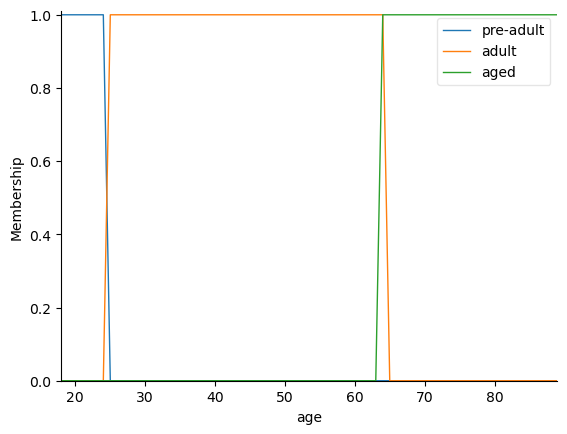

In [7]:
pre_adult = fuzz.trapmf(age.universe, [18, 18, 24,25])

adult = fuzz.trapmf(age.universe, [25, 25, 64,64])

aged = fuzz.trapmf(age.universe, [64, 64, 90,90])

age['pre-adult'] = pre_adult
age['adult'] = adult
age['aged'] = aged

age.view()

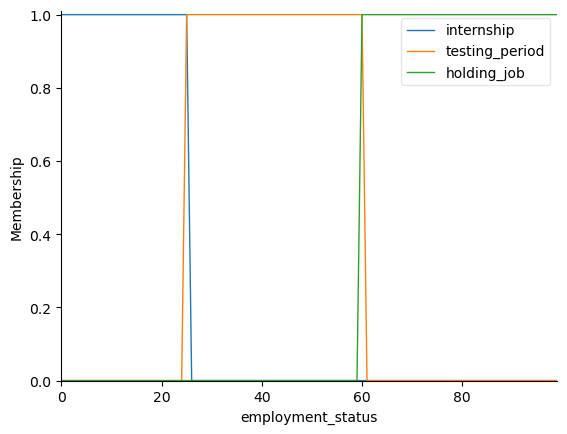

In [8]:
internship = fuzz.trapmf(employment_status.universe, [0, 0, 25, 25])
testing_period = fuzz.trapmf(employment_status.universe, [25, 25, 60, 60])
holding_job = fuzz.trapmf(employment_status.universe, [60, 60, 100, 100])

employment_status['internship'] = internship
employment_status['testing_period'] = testing_period
employment_status['holding_job'] = holding_job

employment_status.view()

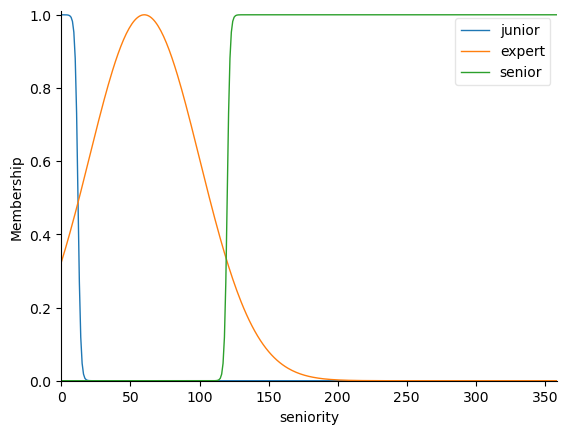

In [9]:
junior = fuzz.sigmf(seniority.universe, 12,-1)
expert = fuzz.gaussmf(seniority.universe, 60,40)
senior = fuzz.sigmf(seniority.universe,120, 1)

seniority['junior'] = junior 
seniority['expert'] = expert
seniority['senior'] = senior

seniority.view()

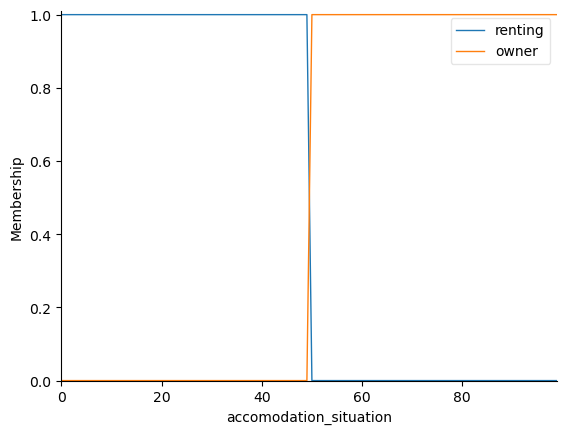

In [10]:
renting = fuzz.trapmf(accomodation_situation.universe, [0, 0, 49,49])
owner = fuzz.trapmf(accomodation_situation.universe, [50, 50, 100,100])
accomodation_situation['renting'] = renting
accomodation_situation['owner'] = owner

accomodation_situation.view()

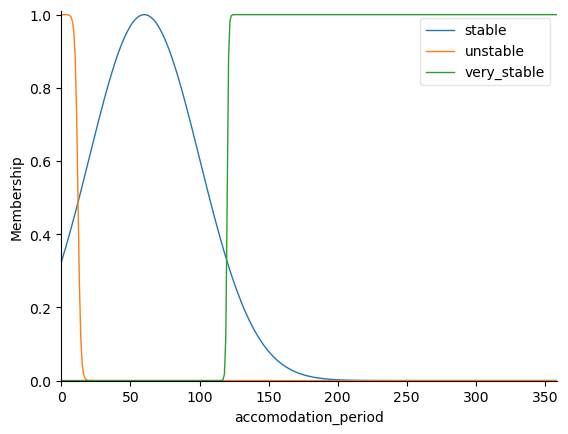

In [11]:
unstable = fuzz.sigmf(accomodation_period.universe, 12,-1)
stable = fuzz.gaussmf(accomodation_period.universe, 60,40)
very_stable = fuzz.sigmf(accomodation_period.universe,120, 2)

accomodation_period['stable'] = stable 
accomodation_period['unstable'] = unstable
accomodation_period['very_stable'] = very_stable

accomodation_period.view()

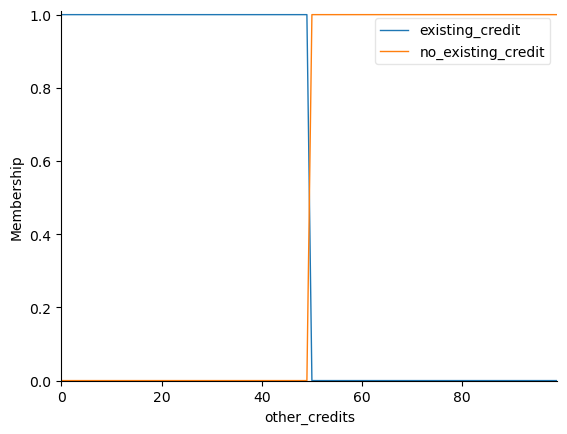

In [12]:
existing_credit = fuzz.trapmf(other_credits.universe, [0, 0, 49,49])
no_existing_credit = fuzz.trapmf(other_credits.universe, [50, 50, 100,100])

other_credits['existing_credit'] = existing_credit
other_credits['no_existing_credit'] = no_existing_credit

other_credits.view()

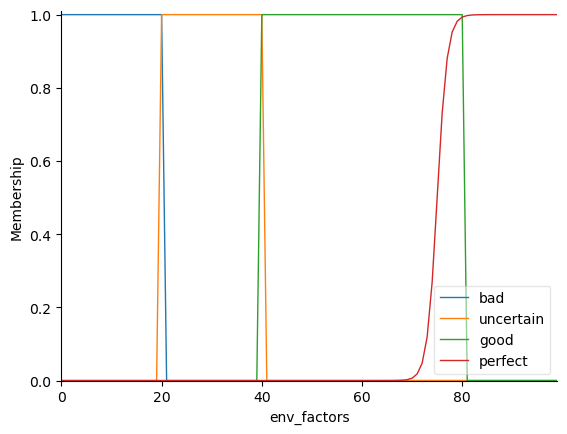

In [13]:
bad = fuzz.trapmf(env_factors.universe, [0,0,20,20])
uncertain = fuzz.trapmf(env_factors.universe, [20,20,40,40])
good = fuzz.trapmf(env_factors.universe, [40,40,80,80])
perfect = fuzz.sigmf(env_factors.universe, 75,1)

env_factors['bad'] = bad
env_factors['uncertain'] = uncertain
env_factors['good'] = good
env_factors['perfect'] = perfect

env_factors.view()

### Rules definition

In [14]:
rule1 = ctrl.Rule( (age['adult'] & employment_status['holding_job'] & seniority['expert'] &
                    accomodation_situation['owner'] & other_credits['no_existing_credit']&
                    (accomodation_period['stable'] | accomodation_period['very_stable']) )
                    , env_factors['perfect'])

In [15]:
rule2 = ctrl.Rule ((employment_status['holding_job'] & accomodation_situation['owner'] 
                    & other_credits['no_existing_credit']),
                   env_factors['good'])

In [16]:
rule3 = ctrl.Rule ((age['pre-adult'] & employment_status['testing_period']  & other_credits['no_existing_credit']),
                   env_factors['good'])

In [17]:
rule4 = ctrl.Rule ((employment_status['testing_period']  & other_credits['existing_credit'] & seniority['junior'] ),
                   env_factors['bad'])

In [18]:
rule5 = ctrl.Rule ((age['aged']  & other_credits['existing_credit'] & accomodation_situation['renting'] ),
                   env_factors['bad'])

In [19]:
rule6 = ctrl.Rule ((employment_status['internship'] & accomodation_situation['renting'] ),
                   env_factors['bad'])

In [20]:
rule7 = ctrl.Rule ((employment_status['holding_job'] & accomodation_situation['renting'] & accomodation_period['unstable']
                    & other_credits['existing_credit']),
                   env_factors['bad'])

In [21]:
rule8 = ctrl.Rule ((age['adult']  & other_credits['existing_credit'] & accomodation_situation['owner'] &
                   employment_status['holding_job'] & seniority['expert'] ),
                   env_factors['uncertain'])

### Simulation

In [22]:
#we compile the rules
credit_scoring_rules = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
env_simulation = ctrl.ControlSystemSimulation(credit_scoring_rules)

In [23]:

#Simulation
'''

We test rule3
pre-adult age => value in the interval [18-24]
employment_status: testing_period => value in the range [25-60]
 other_credits: no_existing_credit => value in the range [50-100]

We then want to obtain a result between 40 and 80 indicating that the environment is good

'''
env_simulation.input['age'] = 23
env_simulation.input['employment_status'] = 30
env_simulation.input['seniority'] = 60
env_simulation.input['accomodation_situation'] = 60
env_simulation.input['accomodation_period'] = 10
env_simulation.input['other_credits'] = 60

env_simulation.compute()

pred = env_simulation.output['env_factors']
pred

59.999999999999986

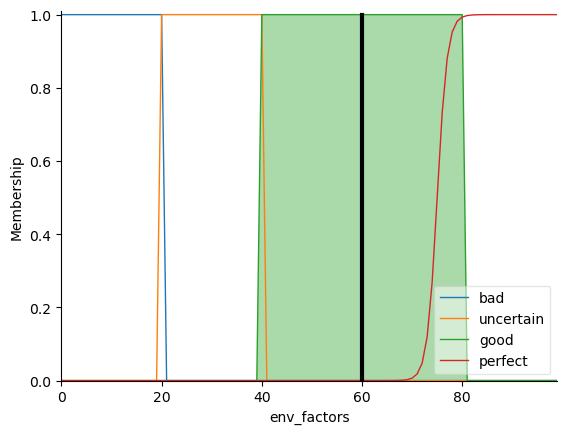

In [24]:
env_factors.view(sim=env_simulation)

## III. Credit Scoring - Fuzzy Logic


Once we have established the function that calculates the client's net annual income and predicted the economic environment's status (categorized as bad, uncertain, good, or perfect), we can combine these two factors as inputs. To complete the assessment, we'll also include the yearly installment for the requested credit. By doing this, we can effectively evaluate whether the client falls into the categories of being a "bad," "uncertain," or "good" applicant for the credit.

In [25]:
#the net annual income will be calculated from other data such as children's ages, marital status ...
net_annual_revenue = ctrl.Antecedent(np.arange(0,500,10), 'net_annual_revenue')

#annual_slice : of the requested credit
#it's usually 33% to 45% of net income
credit_slice = ctrl.Antecedent(np.arange(10,225,10), 'credit_slice')

#environment : the result of the precedent algorithm (env_factors)
environment = ctrl.Antecedent(np.arange(0,100,1), 'environment')


####Consequent
client_status = ctrl.Consequent(np.arange(0,100,1), 'client_status')

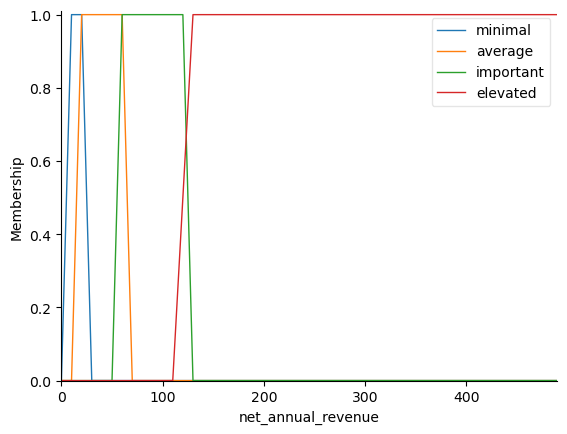

In [26]:
minimal = fuzz.trapmf(net_annual_revenue.universe, [5,10,20,20] )
average = fuzz.trapmf(net_annual_revenue.universe, [20,20,60,60])
important = fuzz.trapmf(net_annual_revenue.universe,[60,60,120,120])
elevated = fuzz.sigmf(net_annual_revenue.universe,120,1)

net_annual_revenue['minimal'] = minimal 
net_annual_revenue['average'] = average
net_annual_revenue['important'] = important
net_annual_revenue['elevated'] = elevated

net_annual_revenue.view()

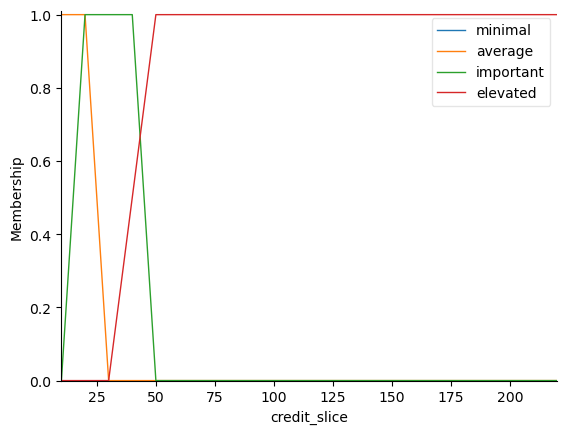

In [27]:
minimal = fuzz.trapmf(credit_slice.universe, [1.5,1.8,7,7])
average = fuzz.trapmf(credit_slice.universe, [7,7,20,20])
important = fuzz.trapmf(credit_slice.universe,[20,20, 40, 40])
elevated = fuzz.sigmf(credit_slice.universe, 40,1)

credit_slice['minimal'] = minimal 
credit_slice['average'] = average
credit_slice['important'] = important
credit_slice['elevated'] = elevated

credit_slice.view()


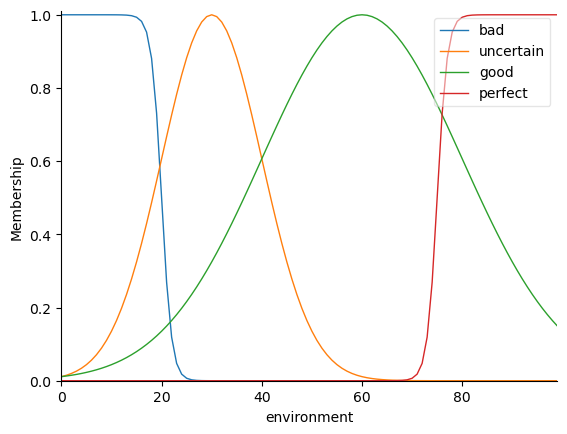

In [28]:
bad = fuzz.sigmf(environment.universe, 20, -1)
uncertain = fuzz.gaussmf(environment.universe, 30,10)
good = fuzz.gaussmf(environment.universe, 60,20)
perfect = fuzz.sigmf(environment.universe, 75,1)

environment['bad'] = bad
environment['uncertain'] = uncertain
environment['good'] = good
environment['perfect'] = perfect

environment.view()

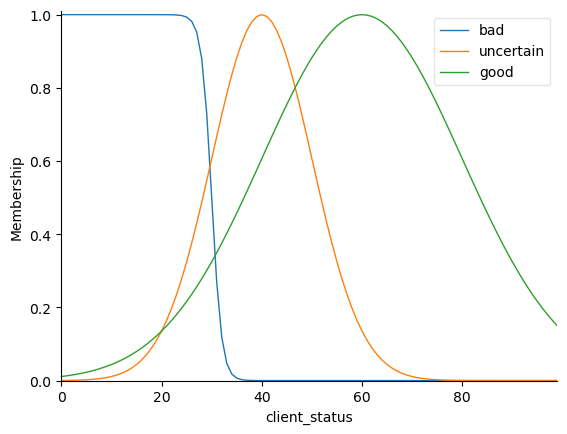

In [29]:
bad = fuzz.sigmf(client_status.universe, 30, -1)
uncertain = fuzz.gaussmf(client_status.universe, 40,10)
good = fuzz.gaussmf(client_status.universe, 60,20)

client_status['bad'] = bad
client_status['uncertain'] = uncertain
client_status['good'] = good

client_status.view()

### Rules

In [30]:

# if the client has a large net annual income,
# the slice may be about 33% of income or less, in which case he is a good client
rule9 = ctrl.Rule ((net_annual_revenue['important'] & (credit_slice['minimal'] | 
                                                      credit_slice['average']  )),
                   client_status['good'])
#if the client's income is large and the slice is large:
# 1st case: favorable environment => good client
rule10 = ctrl.Rule ((net_annual_revenue['important'] & credit_slice['important'] 
                     & (environment['good'] | environment['perfect'])),
                   client_status['good'])

# 2nd case: uncertain environment  => uncertain client 
rule11 = ctrl.Rule ((net_annual_revenue['important'] & credit_slice['important'] 
                     & environment['uncertain'] ),
                   client_status['uncertain'])

#3rd case : bad environment => bad client 
rule12 = ctrl.Rule ((net_annual_revenue['important'] & credit_slice['important'] 
                     & environment['bad'] ),
                   client_status['bad'])



In [31]:

# if the client's income is important and the slice is elevated he will be a bad client
rule13 = ctrl.Rule ((net_annual_revenue['important'] & credit_slice['elevated']),
                   client_status['bad'])


In [32]:

#if the client's income is elevated:
# 1st case: the slice is elevated: this client is uncertain: even if the environment is perfect;
# there is a large margin of error since we do not have
#the exact percentage of credit in relation to income
rule14 = ctrl.Rule ((net_annual_revenue['elevated'] & credit_slice['elevated']),
                   client_status['uncertain'])


# 2nd case: and the slice is important: you need a not bad environment
rule15 = ctrl.Rule ((net_annual_revenue['elevated'] & credit_slice['important'] 
                     & (~environment['bad'] )),
                   client_status['good'])

# 3rd case: minimal slice / average => good client (whatever the state of the environment)
rule16 = ctrl.Rule ((net_annual_revenue['elevated'] & (credit_slice['minimal']
                                                            |credit_slice['average'])),
                   client_status['good'])

In [33]:

#if the client's income is average:
# 1st case: the slice is important or elevated => bad customer
rule17 = ctrl.Rule ((net_annual_revenue['average'] & (credit_slice['important']
                                                   |credit_slice['elevated'])),
                   client_status['bad'])


# 2nd case: the slice is average: you need a good / perfect environment for it to be a good client
rule18 = ctrl.Rule ((net_annual_revenue['average'] & credit_slice['average'] 
                     & (environment['good'] | environment['perfect'])),
                   client_status['good'])


# 3rd case: range average & uncertain environment  => uncertain client 
rule19 = ctrl.Rule ((net_annual_revenue['average'] & credit_slice['average']
                     & environment['uncertain']),
                   client_status['uncertain'])

#3eme cas : minimal slice & bad environment  => uncertain client 
rule20 = ctrl.Rule ((net_annual_revenue['average'] & credit_slice['minimal']
                     & environment['bad']),
                   client_status['uncertain'])

#4eme cas :  minimal slice & not bad environment  => good client  
rule21 = ctrl.Rule ((net_annual_revenue['average'] & credit_slice['minimal']
                     & (~environment['bad'])),
                   client_status['good'])


In [34]:
#if the client's income is minimum:
# 1st case: the slice is minimum and the environment is good / perfect => good client
rule22 = ctrl.Rule ((net_annual_revenue['minimal'] & credit_slice['minimal']
                     &(environment['good'] | environment['perfect'] )),
                   client_status['good'])


# 2nd case: the slice is minimum and the environment is bad / uncertain => uncertain client 
rule23 = ctrl.Rule ((net_annual_revenue['minimal'] & credit_slice['minimal'] 
                     & (environment['bad'] | environment['uncertain'])),
                   client_status['uncertain'])

#3rd case : slice is average/important/elevated => bad client (whatever the environment state is)
rule24 = ctrl.Rule ((net_annual_revenue['minimal'] & (credit_slice['elevated']
                                                     |credit_slice['important']
                                                      |credit_slice['average'])),
                   client_status['bad'])

## IV. Simulation 




In [35]:
'''

We test rule10
net_annual_revenue: important => value in the range [60-120]
credit_slice: important => value in the range [20-40]
environment: good (we already had in the previous simulation))

We then want to obtain a result that it is a good customer

'''

#the inputs we will use:
#1. 
annual_credit_slice = 30
#2. Calcul du revenu annuel net
ages = [12,20]
marital_status = "divorced"
annual_revenue = 80
rent=0
other_annual_revenues = 20


net_revenue = calcul_net_revenue(ages, marital_status, annual_revenue, rent, other_annual_revenues)
net_revenue


child age :  12 child cost : 3
child age :  20 child cost : 7.2


113.8

In [36]:
# 3. we get the prediction we have already made
test_environment = pred
test_environment

59.999999999999986

In [37]:
#we compile the rules
scoring_rules = ctrl.ControlSystem([rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule17,
                                    rule18, rule19, rule20, rule21, rule22, rule23, rule24])

simulation = ctrl.ControlSystemSimulation(scoring_rules)

#Simulation
simulation.input['net_annual_revenue'] = net_revenue
simulation.input['credit_slice'] = annual_credit_slice
simulation.input['environment'] = test_environment
simulation.compute()

print(simulation.output['client_status'])

58.86513330568803


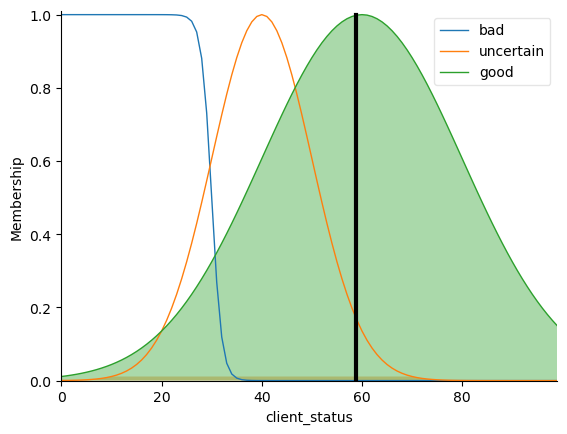

In [38]:
client_status.view(sim=simulation)

**The test result tells that it's a good client, as expected.**